In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Read the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/Amazon Reviews/Review1.csv')

In [ ]:
import string
import inspect
import seaborn as sns

Define a function to map ratings to binary values


In [ ]:
def rating(num):
    if(num == 1):
        return 0
    else:
        return 1

In [ ]:
colnames = ['Rating', 'Title', 'Description']
df = pd.read_csv('/content/drive/MyDrive/data/Amazon Reviews/Review1.csv', names=colnames)
df = df.sample(10000, random_state = 42)
df['Reviews'] = df['Title'] + ' . ' + df['Description']
df = df.drop(['Title','Description'], axis=1)
df['Rating'] = df['Rating'].apply(rating)

In [ ]:
# remove 'No Negative' or 'No Positive' from text
df['Reviews'] = df['Reviews'].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [ ]:
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def clean_text(text):
    # lower text
    text = text.lower()
    # remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    stop = [w for w in stop if w not in ['not', 'no']]
    text = [x for x in text if (x not in stop)]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(t) for t in text]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df['review_clean'] = df['Reviews'].apply(lambda x: clean_text(x))
df.head()

,Rating,Reviews,review_clean
2079998,0,Expensive Junk . This product consists of a pi...,expensive junk product consists piece thin fle...
1443106,0,"Toast too dark . Even on the lowest setting, t...",toast dark even lowest setting toast dark liki...
3463669,1,Excellent imagery...dumbed down story . I enjo...,excellent imagery...dumbed story enjoyed disc ...
2914699,0,Are we pretending everyone is married? . The a...,pretending everyone married author pretend par...
1603231,0,Not worth your time . Might as well just use a...,not worth time might well use knife product ho...


In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Initialize the SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis using VADER on the cleaned reviews
df["sentiments"] = df["Reviews"].apply(lambda x: sid.polarity_scores(x))

# Concatenate 'Sentiment' column into separate columns
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)
df.head()

,Rating,Reviews,review_clean,neg,neu,pos,compound
2079998,0,Expensive Junk . This product consists of a pi...,expensive junk product consists piece thin fle...,0.000,0.854,0.146,0.9041
1443106,0,"Toast too dark . Even on the lowest setting, t...",toast dark even lowest setting toast dark liki...,0.170,0.769,0.061,-0.5859
3463669,1,Excellent imagery...dumbed down story . I enjo...,excellent imagery...dumbed story enjoyed disc ...,0.058,0.613,0.330,0.9686
2914699,0,Are we pretending everyone is married? . The a...,pretending everyone married author pretend par...,0.112,0.761,0.127,0.0377
1603231,0,Not worth your time . Might as well just use a...,not worth time might well use knife product ho...,0.175,0.743,0.082,-0.3326


In [ ]:
# add number of characters column
df["nb_chars"] = df["Reviews"].apply(lambda x: len(x))

In [ ]:
# add number of words column
df["nb_words"] = df["Reviews"].apply(lambda x: len(x.split(" ")))

In [ ]:
df.head()

,Rating,Reviews,review_clean,neg,neu,pos,compound,nb_chars,nb_words
2079998,0,Expensive Junk . This product consists of a pi...,expensive junk product consists piece thin fle...,0.000,0.854,0.146,0.9041,624,102
1443106,0,"Toast too dark . Even on the lowest setting, t...",toast dark even lowest setting toast dark liki...,0.170,0.769,0.061,-0.5859,208,40
3463669,1,Excellent imagery...dumbed down story . I enjo...,excellent imagery...dumbed story enjoyed disc ...,0.058,0.613,0.330,0.9686,411,71
2914699,0,Are we pretending everyone is married? . The a...,pretending everyone married author pretend par...,0.112,0.761,0.127,0.0377,383,66
1603231,0,Not worth your time . Might as well just use a...,not worth time might well use knife product ho...,0.175,0.743,0.082,-0.3326,125,26


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
# add tf-idfs columns
tfidf = TfidfVectorizer(min_df=10)
tfidf_result = tfidf.fit_transform(df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns=tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

In [ ]:
df.head()

,Rating,Reviews,review_clean,neg,neu,pos,compound,nb_chars,nb_words,word_aa,...,word_young,word_younger,word_your,word_youtube,word_yr,word_zero,word_zipper,word_zombie,word_zone,word_zoom
2079998,0,Expensive Junk . This product consists of a pi...,expensive junk product consists piece thin fle...,0.000,0.854,0.146,0.9041,624,102,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1443106,0,"Toast too dark . Even on the lowest setting, t...",toast dark even lowest setting toast dark liki...,0.170,0.769,0.061,-0.5859,208,40,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3463669,1,Excellent imagery...dumbed down story . I enjo...,excellent imagery...dumbed story enjoyed disc ...,0.058,0.613,0.330,0.9686,411,71,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914699,0,Are we pretending everyone is married? . The a...,pretending everyone married author pretend par...,0.112,0.761,0.127,0.0377,383,66,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603231,0,Not worth your time . Might as well just use a...,not worth time might well use knife product ho...,0.175,0.743,0.082,-0.3326,125,26,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Word Embeeding**

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
#create doc2vec vector columns
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)


In [ ]:
# transform each document into a vector data
doc2vec_df = df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)

In [ ]:
# show is_bad_review distribution
df["Rating"].value_counts(normalize = True)

1    0.5046
0    0.4954
Name: Rating, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Reviews", "pos"]].head(10)

,Reviews,pos
600142,Thanks and God Bless . Thanks and God Bless fo...,0.694
3574869,"Fun, nice challeges. . Fun game, better graphi...",0.650
3533096,"Great, but . . . . The switch fit perfectly an...",0.649
2859986,A must have! . Wonderful facts and great drawi...,0.647
2068335,"awesome! . I love, love, love this movie! I hi...",0.638
1919426,Awesome! . She sings like an angel! Truly bles...,0.632
2984178,Great gift .. . I sent this to a friend in Tex...,0.624
1338725,great self help . Good book to help save lawye...,0.611
1502026,good gift . soft on the inside and fits very w...,0.598
3070896,is great . i wait a few days but i recived in ...,0.586


In [ ]:
# lowest negative sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Reviews", "neg"]].head(10)

,Reviews,neg
45442,Not good . Did not like the book really boring...,0.489
752170,worst book ever . contains almost no illustrat...,0.486
1385429,"Hmmm, let's see now... . ...Vomit-inducing, un...",0.485
1670129,Bad Choice . Unfortunately it was the worst pr...,0.460
971267,Bad product . Sold me a bad product and it was...,0.443
112539,waste of money . Half of the time your A STUPI...,0.440
1369466,Engine failed . The waterject failed to operat...,0.435
2391738,"Terrible, terrible, terrible . I had the same ...",0.426
489406,Outrage with Banderas . This movie is horrible...,0.424
2434994,Very Bad Movie!! . This was a very very bad mo...,0.407


<ipython-input-26-e05d14c693a7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)
<ipython-input-26-e05d14c693a7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)


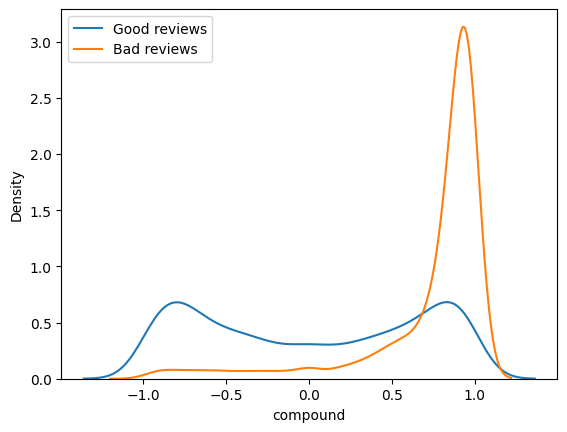

In [ ]:
for x in [0, 1]:
    subset = df[df['Rating'] == x]

    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)
plt.legend()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# feature selection
label = "Rating"
ignore_cols = [label, "Reviews", "review_clean"]
features = [c for c in df.columns if c not in ignore_cols]

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size = 0.20, random_state = 42)

# MODEL TRAINING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, average_precision_score, precision_recall_curve, accuracy_score

LogisticRegression

In [ ]:
df['review_clean'][2079998]

'expensive junk product consists piece thin flexible insulating material adhesive backed velcro white electrical instruction three picture little velcro crumpled received stronger adhesive tried disengage velcro piece came paint white electrical tape horrible cheap narrow fell le price ripoff.i building easier use cheaper attractive higher r-value surprised amazon even list junk'

In [ ]:
# Fit the logistic regression model
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)

# Obtain predictions on the testing data
lr_preds = lr.predict(X_test)

# Convert the predicted labels to positive (1) or negative (0) based on a threshold
threshold = 0.5
predicted_sentiment = ['Positive' if pred >= threshold else 'Negative' for pred in lr_preds]

# Add the 'review_clean' column back to the DataFrame
X_test['review_clean'] = df.loc[X_test.index, 'review_clean']

# Print the reviews along with their predicted sentiment
for review, sentiment in zip(X_test['review_clean'], predicted_sentiment):
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment}")
    print('expensive junk product consists piece thin flexible insulating material adhesive backed velcro white electrical instruction three picture little velcro crumpled received stronger adhesive tried disengage velcro piece came paint white electrical tape horrible cheap narrow fell le price ripoff.i building easier use cheaper attractive higher r-value surprised amazon even list junk')
    print('hiring manager also job seeker good book use hiring manager job seeker job seeker help prepare wide array question really open mind build confidence going interview')

In [ ]:
# Get the predicted probabilities for the positive class
lr_preds_prob = lr.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr2_preds_prob, pos_label=1)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()